In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as px
import matplotlib.pyplot as plt

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
import warnings; warnings.simplefilter('ignore')

In [3]:
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [4]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


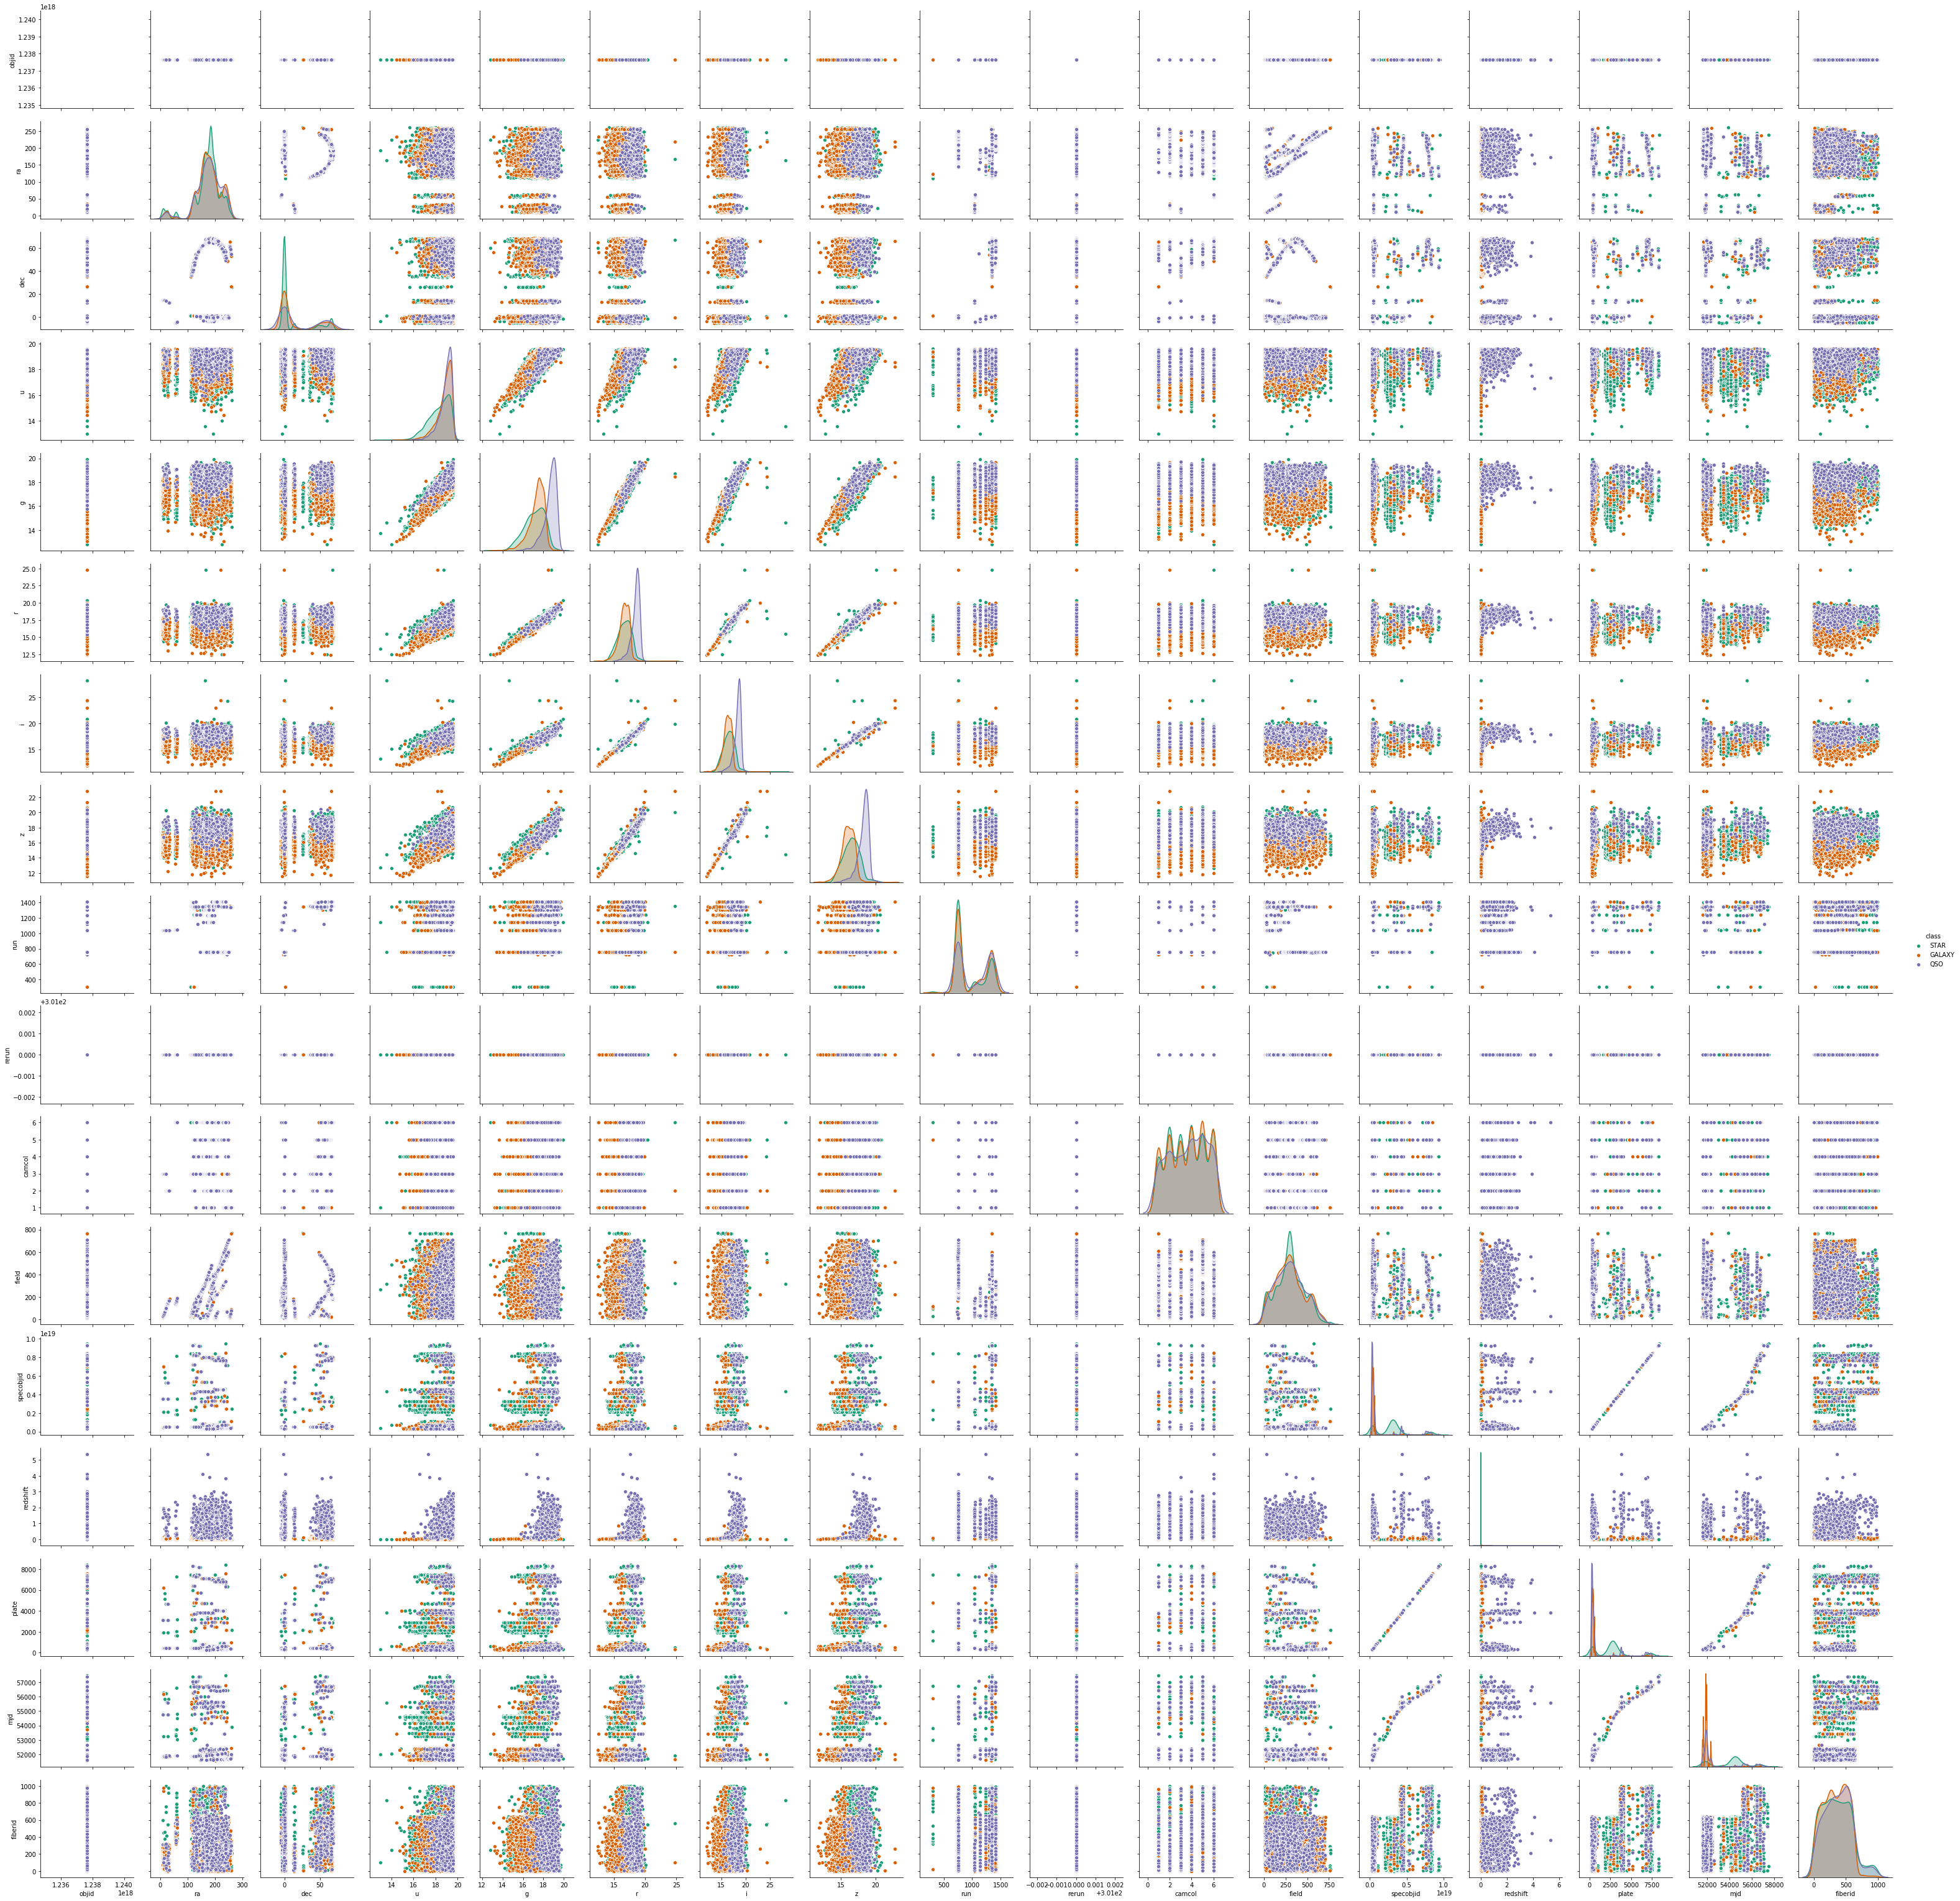

In [11]:
sns.pairplot(data = data, palette = 'Dark2', hue = 'class')

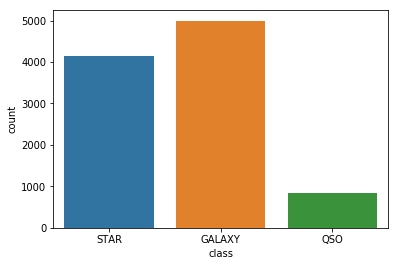

In [6]:
data['class'].head(10)
ax = sns.countplot(x='class',data=data)

In [12]:
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

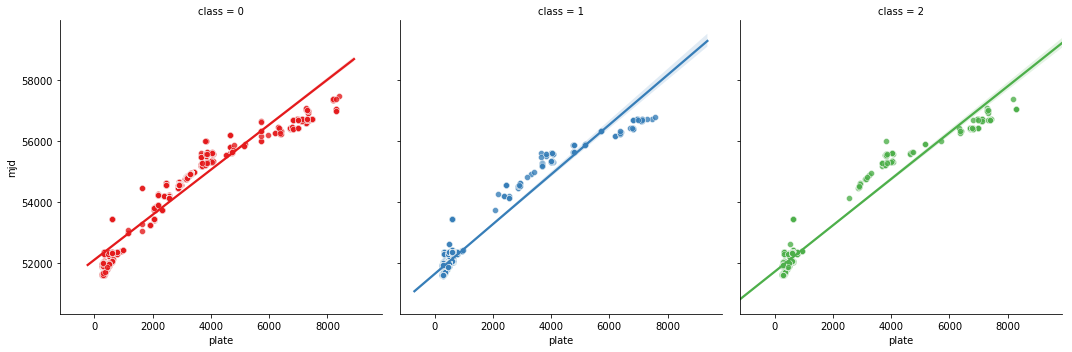

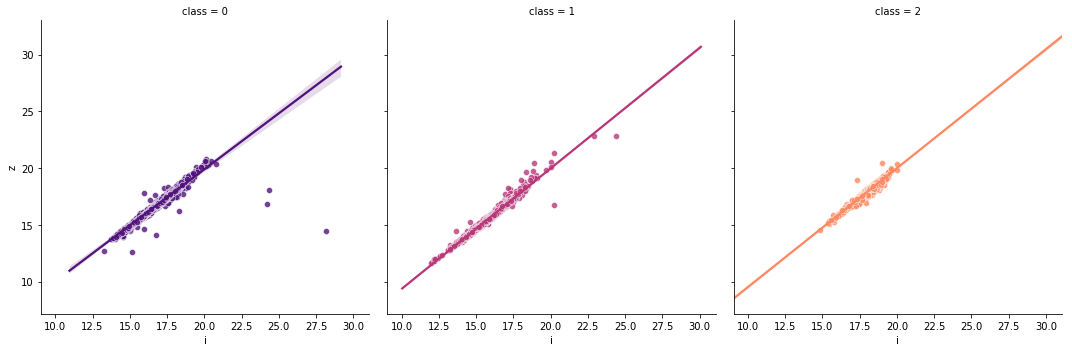

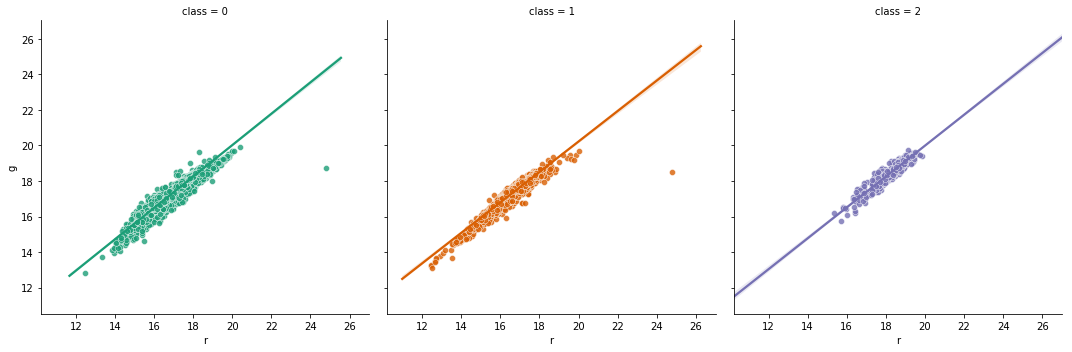

In [13]:
sns.lmplot(x = 'plate', y='mjd', data = data, hue='class', col = 'class', palette='Set1', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'i', y='z', data = data, hue='class', col = 'class', palette='magma', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'r', y='g', data = data, hue='class', col = 'class', palette='Dark2', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})

Text(0.5, 1.0, 'Equatorial coordinates')

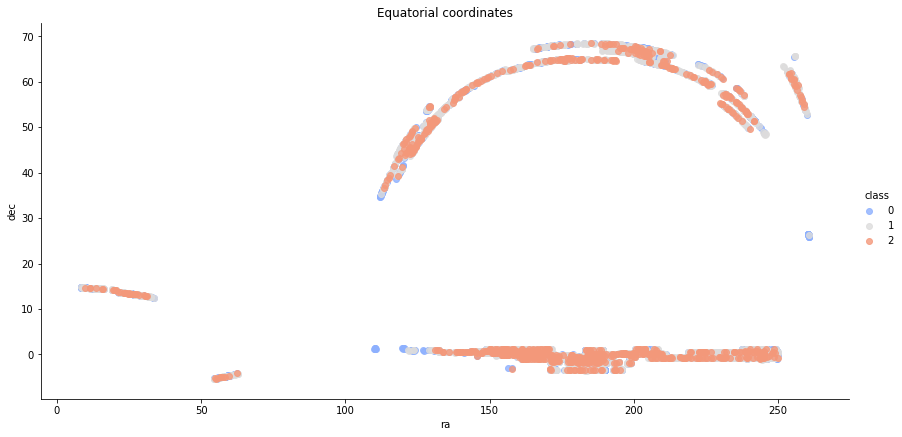

In [10]:
sns.lmplot(x='ra', y='dec', data=data, hue='class', fit_reg=False, palette='coolwarm', size=6, aspect=2)
plt.title('Equatorial coordinates')

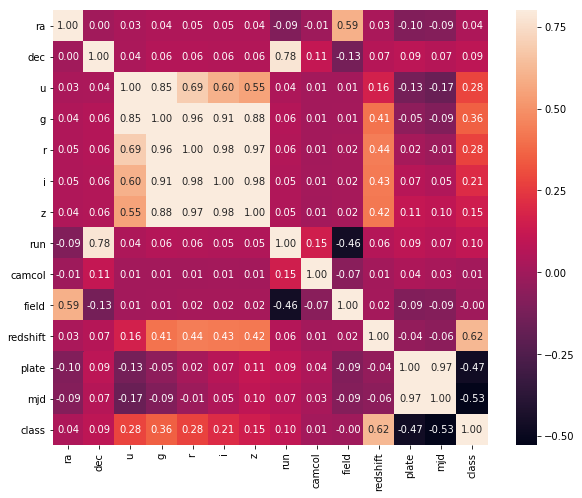

In [11]:
data=data.drop(['objid','rerun','specobjid','fiberid'],axis=1)
#recall the heatmap
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 , annot=True,square=True,fmt=".2f")

In [12]:
data.describe()

ra           dec             u             g             r  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     175.529987     14.836148     18.619355     17.371931     16.840963   
std       47.783439     25.212207      0.828656      0.945457      1.067764   
min        8.235100     -5.382632     12.988970     12.799550     12.431600   
25%      157.370946     -0.539035     18.178035     16.815100     16.173333   
50%      180.394514      0.404166     18.853095     17.495135     16.858770   
75%      201.547279     35.649397     19.259232     18.010145     17.512675   
max      260.884382     68.542265     19.599900     19.918970     24.802040   

                  i             z           run        camcol         field  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      16.583579     16.422833    981.034800      3.648700    302.380100   
std        1.141805      1.203188    273.305024      1.666183    162.577763   
min       11.947210     11.610410    308.000000      1.000000     11.000000   
25%       15.853705     15.618285    752.000000      2.000000    184.000000   
50%       16.554985     16.389945    756.000000      4.000000    299.000000   
75%       17.258550     17.141447   1331.000000      5.000000    414.000000   
max       28.179630     22.833060   1412.000000      6.000000    768.000000   

           redshift         plate           mjd         class  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean       0.143726   1460.986400  52943.533300      0.669800  
std        0.388774   1788.778371   1511.150651      0.625465  
min       -0.004136    266.000000  51578.000000      0.000000  
25%        0.000081    301.000000  51900.000000      0.000000  
50%        0.042591    441.000000  51997.000000      1.000000  
75%        0.092579   2559.000000  54468.000000      1.000000  
max        5.353854   8410.000000  57481.000000      2.000000

<Figure size 432x288 with 0 Axes>

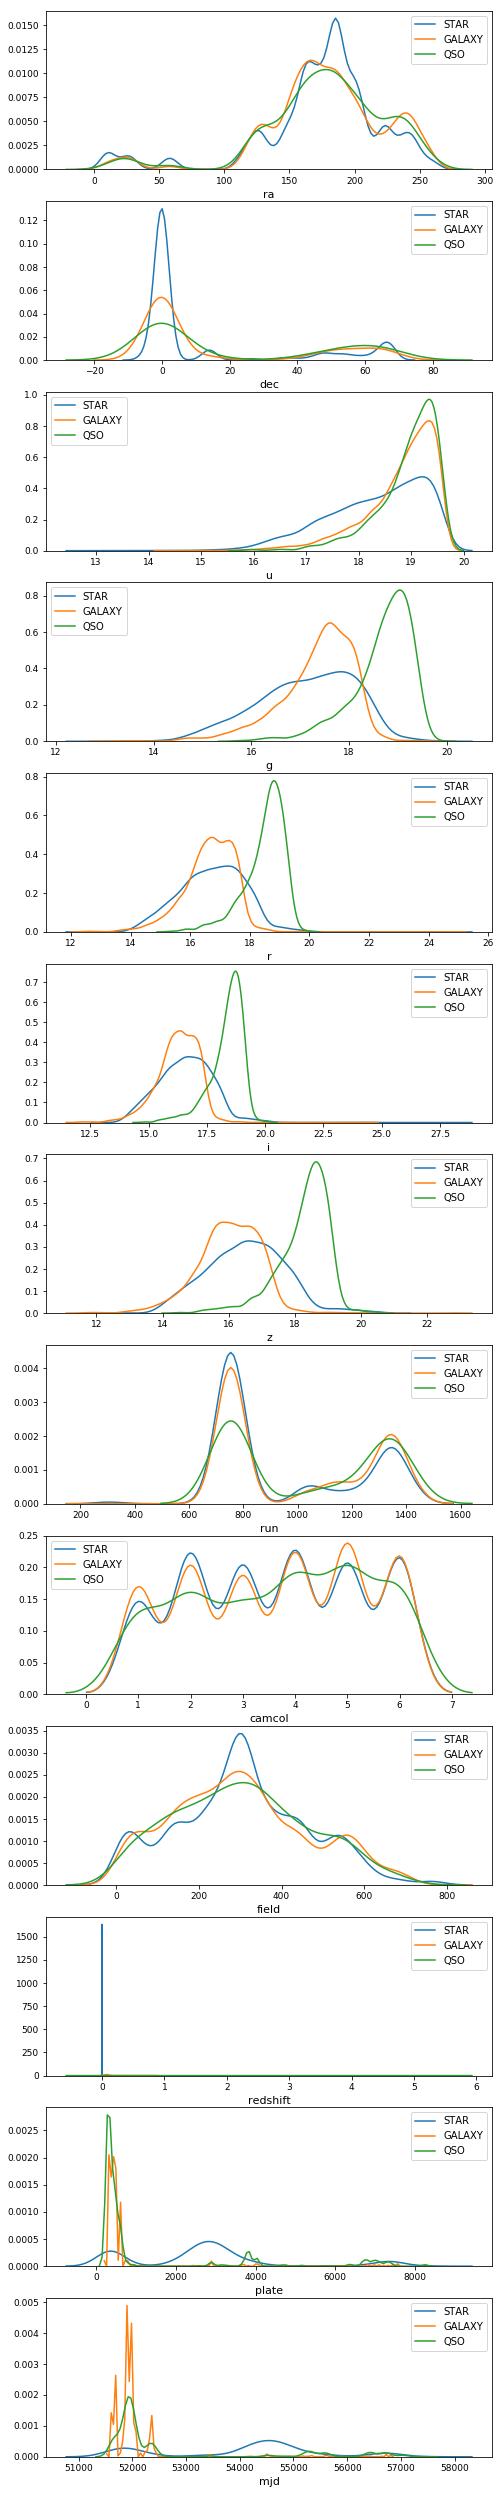

In [13]:
def feature_dist(df0,df1,df2,label0,label1,label2,features):
    plt.figure()
    fig,ax=plt.subplots(13,1,figsize=(8,45))
    i=0
    for ft in features:
        i+=1
        plt.subplot(13,1,i)
        # plt.figure()
        sns.distplot(df0[ft], hist=False,label=label0)
        sns.distplot(df1[ft], hist=False,label=label1)
        sns.distplot(df2[ft], hist=False,label=label2)
        plt.xlabel(ft, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=9)
        plt.tick_params(axis='y', labelsize=9)
    plt.show()
t0 = data.loc[data['class'] == 0]
t1 = data.loc[data['class'] == 1]
t2 = data.loc[data['class'] == 2]
features = data.columns.values[:13]
feature_dist(t0,t1,t2, 'STAR', 'GALAXY','QSO', features)

In [14]:
data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

class  redshift
2      2  1.218366
1      1  0.080325
0      0  0.000043

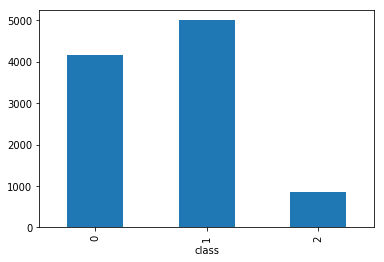

In [15]:
counts = data.groupby(['class'])['class'].count().plot(kind='bar')

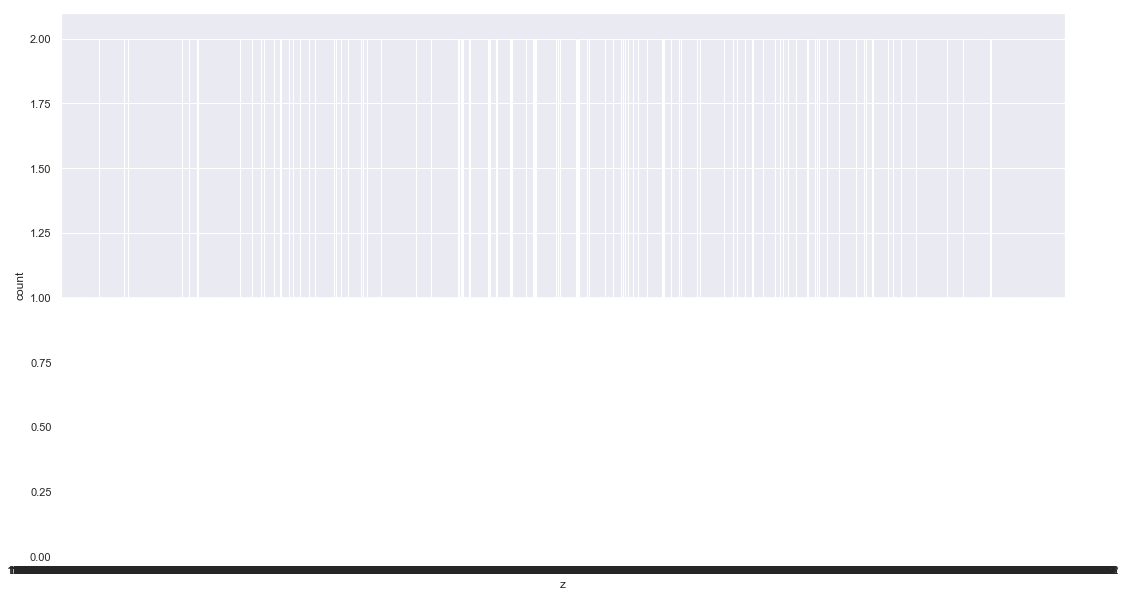

In [19]:
plt.figure(figsize=(18,10))
sns.set()
sns.countplot(data['z'],color='r')

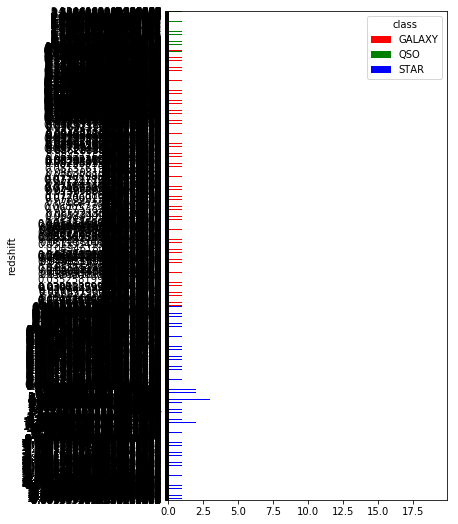

In [5]:
plt.rcParams['figure.figsize'] = (5,9)
pd.crosstab(data['redshift'],data['class']).plot(kind='barh',color=('r','g','b'))

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
X=data.drop(['class'],axis=1)
y=data['class']

In [8]:
X=StandardScaler().fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)
X_train

array([[ 0.        , -0.93572463,  1.471357  , ..., -0.56688806,
        -0.70581092, -0.36875369],
       [ 0.        , -0.15402103, -0.54648393, ...,  1.32835484,
         1.73946796,  2.88398298],
       [ 0.        , -0.05468482, -0.62355222, ...,  0.79164889,
         1.04526023, -0.30573495],
       ...,
       [ 0.        ,  1.44339239, -0.60824952, ..., -0.623354  ,
        -0.82757853, -1.00378872],
       [ 0.        , -0.04586363,  1.98709129, ..., -0.48302776,
        -0.58536687,  0.77527888],
       [ 0.        , -0.02855027, -0.64485605, ..., -0.63341724,
        -0.43778983, -0.11183112]])

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [11]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

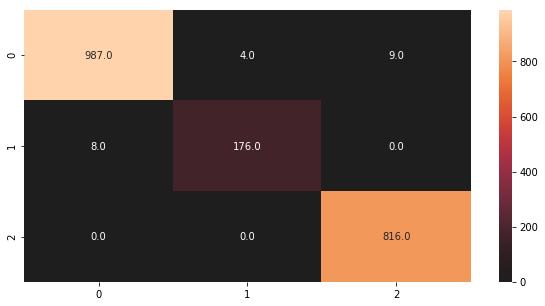

In [20]:
plt.rcParams['figure.figsize'] = (10,5)
sns.heatmap(confusion_matrix(y_test , y_pred), center=True,annot=True,fmt='.1f')

In [21]:
y_pred = random_forest.predict(X_test)

Test_acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 3)
print("Score ",Test_acc_random_forest)

Score  98.95


In [16]:
print ("The accuracy of model 2 : ",accuracy_score(y_test, y_pred))
print ("The f1 score of model 2 : ", f1_score(y_test, y_pred, average = None))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

The accuracy of model 2 :  0.9895
The f1 score of model 2 :  [0.98947368 0.96703297 0.99451554]
Confusion Matrix on Test Data


Predicted  GALAXY  QSO  STAR   All
True                              
GALAXY        987    4     9  1000
QSO             8  176     0   184
STAR            0    0   816   816
All           995  180   825  2000

# Logistic

In [24]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [27]:
lr = LogisticRegression(max_iter=120)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

      GALAXY       0.99      0.98      0.99      1000
         QSO       0.98      0.97      0.98       184
        STAR       0.98      1.00      0.99       816

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix: 
 [[983   2  15]
 [  5 179   0]
 [  0   1 815]]
Training Score:  0.98525
Testing Score:  0.9885


In [30]:
print ("The accuracy of model 2 : ",accuracy_score(y_test, y_pred))
print ("The f1 score of model 2 : ", f1_score(y_test, y_pred, average = None))
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

The accuracy of model 2 :  0.9885
The f1 score of model 2 :  [0.9889336  0.97814208 0.99027947]


Predicted  GALAXY  QSO  STAR   All
True                              
GALAXY        983    2    15  1000
QSO             5  179     0   184
STAR            0    1   815   816
All           988  182   830  2000

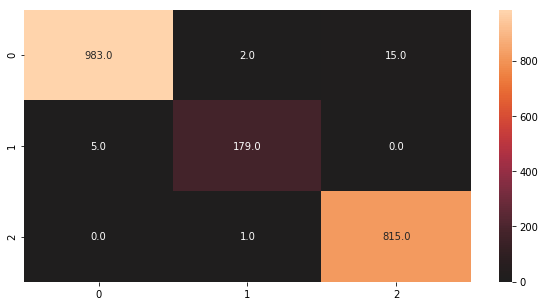

In [29]:
plt.rcParams['figure.figsize'] = (10,5)
sns.heatmap(confusion_matrix(y_test , y_pred), center=True,annot=True,fmt='.1f')